In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

link ="http://books.toscrape.com/catalogue/page-1.html"

response = requests.get(link)
soup = BeautifulSoup(response.text , 'html.parser')

books = soup.find_all('article' , class_ = 'product_pod')

book_data = []

for book in books :
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_data.append([title, price])

df = pd.DataFrame(book_data , columns=['Title' , 'Price'])

df.head()


,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23


In [3]:
# import os

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
all_books = []

num_pages = 50  

for page in range(1, num_pages + 1):
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    
    books = soup.find_all('article', class_='product_pod')
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating = book.p['class'][1]  

        all_books.append([title, price, rating])


df = pd.DataFrame(all_books, columns=['Title', 'Price', 'Rating'])


df.to_csv(r'C:\Users\omar\Documents\books_data.csv', index=False)

print("✅Data successfuly saved at books_data.csv!")

✅Data successfuly saved at books_data.csv!


In [4]:
path = r'C:\Users\omar\Documents\books_data.csv'

In [5]:
data = pd.read_csv(path)
data.head()

,Title,Price,Rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1000 non-null   object
 1   Price   1000 non-null   object
 2   Rating  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [7]:
data

,Title,Price,Rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,Four
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,Five
998,1st to Die (Women's Murder Club #1),Â£53.98,One


In [8]:
data["Price"] = data["Price"].str.replace("Â£" , "").astype(float)

In [9]:
ratings_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
data["Rating"] = data["Rating"].map(ratings_map)

In [10]:
data

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1000 non-null   object 
 1   Price   1000 non-null   float64
 2   Rating  1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [12]:
data.describe()

,Price,Rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


C:\Users\omar\AppData\Local\Temp\ipykernel_11016\3084879020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Rating"], palette="viridis")


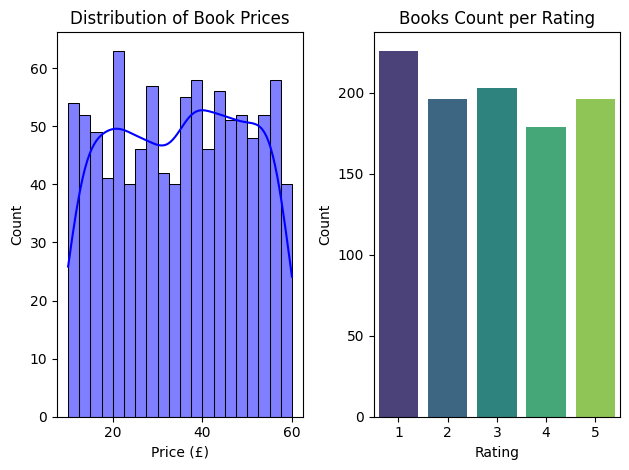

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.Figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data["Price"], bins=20, kde=True, color="blue")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.title("Distribution of Book Prices")
# plt.show()

plt.subplot(1, 2, 2)
sns.countplot(x=data["Rating"], palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Books Count per Rating")

plt.tight_layout()
plt.show()

In [14]:
rating_counts = data['Rating'].value_counts()
rating_counts

Rating
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64

In [15]:
print(data.isnull().sum())

Title     0
Price     0
Rating    0
dtype: int64


In [16]:
print(data.describe())

            Price       Rating
count  1000.00000  1000.000000
mean     35.07035     2.923000
std      14.44669     1.434967
min      10.00000     1.000000
25%      22.10750     2.000000
50%      35.98000     3.000000
75%      47.45750     4.000000
max      59.99000     5.000000


In [17]:
for p in (data['Price'].unique()) :
    if  p < 0 : 
        print("Refused")
    else : 
        print("accepted...!")

accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!
accepted...!

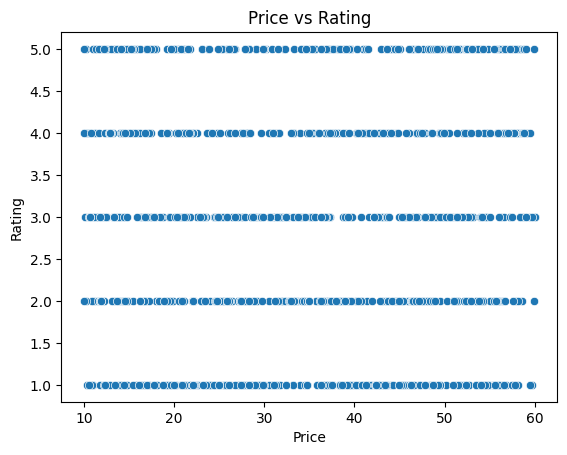

In [18]:
plt.Figure(figsize=(10,6))
sns.scatterplot(x=data['Price'] , y=data['Rating'])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.show()



In [19]:
correlation = data["Price"].corr(data["Rating"])
print(f"Correlation between Price and Rating: {correlation:.2f}")


Correlation between Price and Rating: 0.03


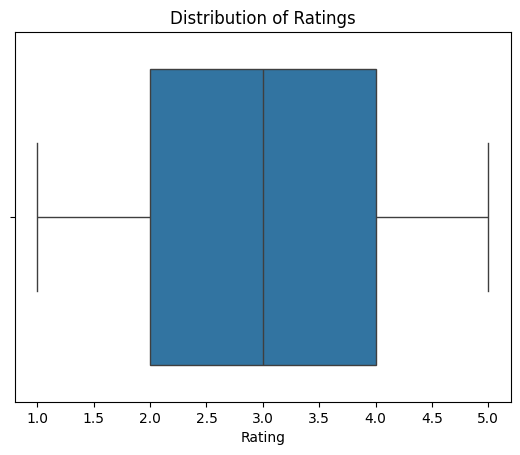

In [20]:
plt.Figure(figsize=(6,4))
sns.boxplot(x=data['Rating'])
plt.title("Distribution of Ratings")
plt.show()


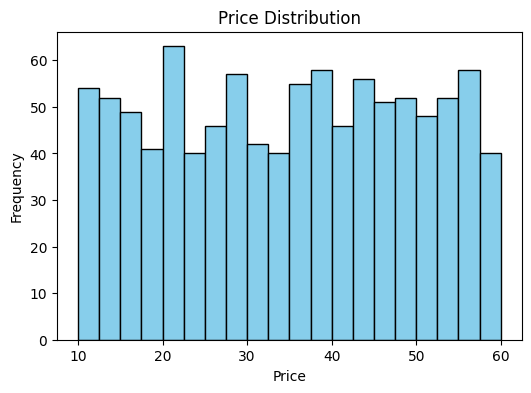

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(data["Price"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()




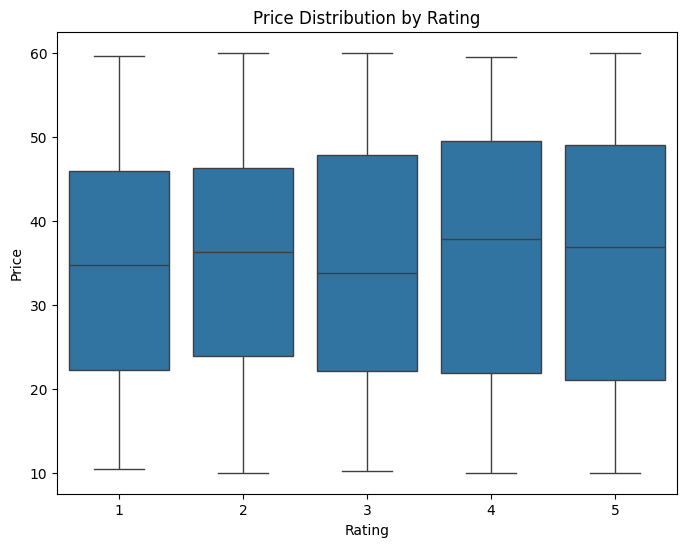

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Rating"], y=data["Price"])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Price Distribution by Rating")
plt.show()


C:\Users\omar\AppData\Local\Temp\ipykernel_11016\1819269235.py:4: FutureWarning: The provided callable <function mean at 0x0000020C64A14360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = data.pivot_table(values="Price", index="Rating", aggfunc=np.mean)


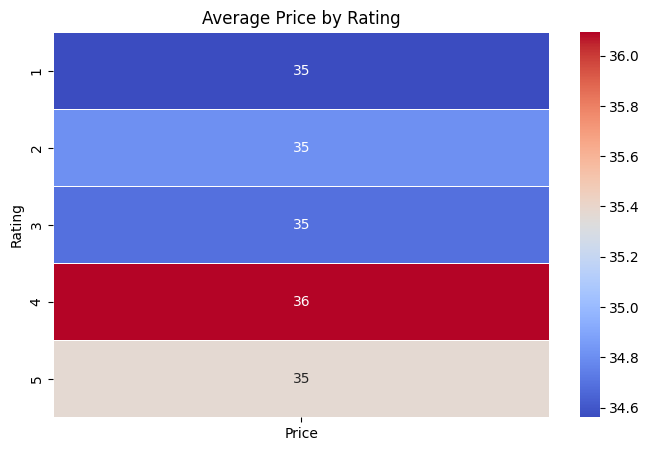

In [23]:
import numpy as np
import seaborn as sns

heatmap_data = data.pivot_table(values="Price", index="Rating", aggfunc=np.mean)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Average Price by Rating")
plt.show()
